# Import Libraries

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import missingno
from scipy import stats

# Read_Data

In [2]:
data=pd.read_csv('50_StartUp_for_train.csv')
df=copy.deepcopy(data)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Check and drop Duplicated

In [3]:
df.duplicated().sum()

0

In [4]:
df = df.drop_duplicates()
df.duplicated().sum()

0

# Get Information of Data

In [5]:
df.shape

(50, 5)

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.describe(include=['object'])

,State
count,50
unique,3
top,New York
freq,17


In [8]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: >

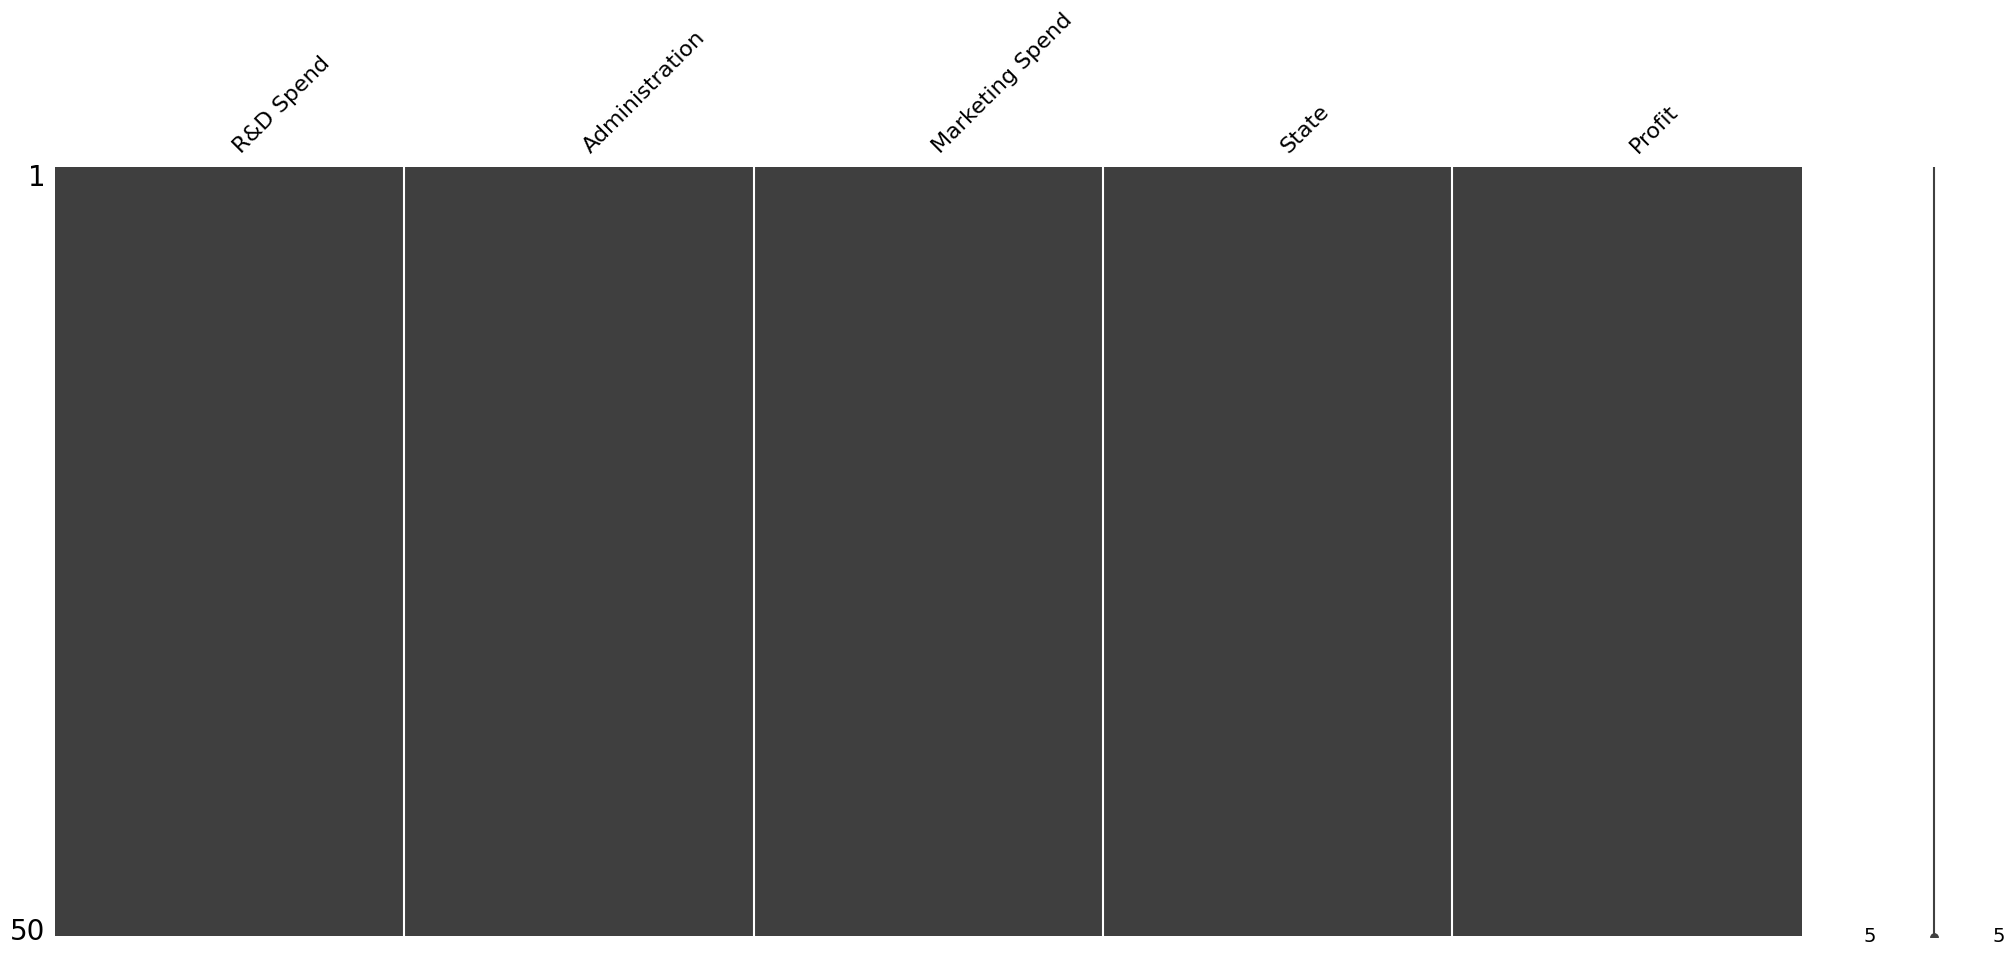

In [9]:
missingno.matrix(df)
# missingno.bar(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df.columns.tolist()

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

## Identify columns with missing values

In [12]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# Correlation Coefficient

In [16]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
for param in numeric_columns:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Profit'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value,'\n')

R&D Spend
The Pearson Correlation Coefficient for  R&D Spend  is 0.9729004656594832  with a P-value of P = 3.5003222436905986e-32 

Administration
The Pearson Correlation Coefficient for  Administration  is 0.20071656826872136  with a P-value of P = 0.1622173947035821 

Marketing Spend
The Pearson Correlation Coefficient for  Marketing Spend  is 0.7477657217414766  with a P-value of P = 4.381073182030979e-10 

Profit
The Pearson Correlation Coefficient for  Profit  is 1.0  with a P-value of P = 0.0 



## Heatmap

In [18]:
# without str column in dataset
# correlations=df.corr()
# drop str column to get correlations
correlations=df.drop(['State'],axis=1).corr()
correlations

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


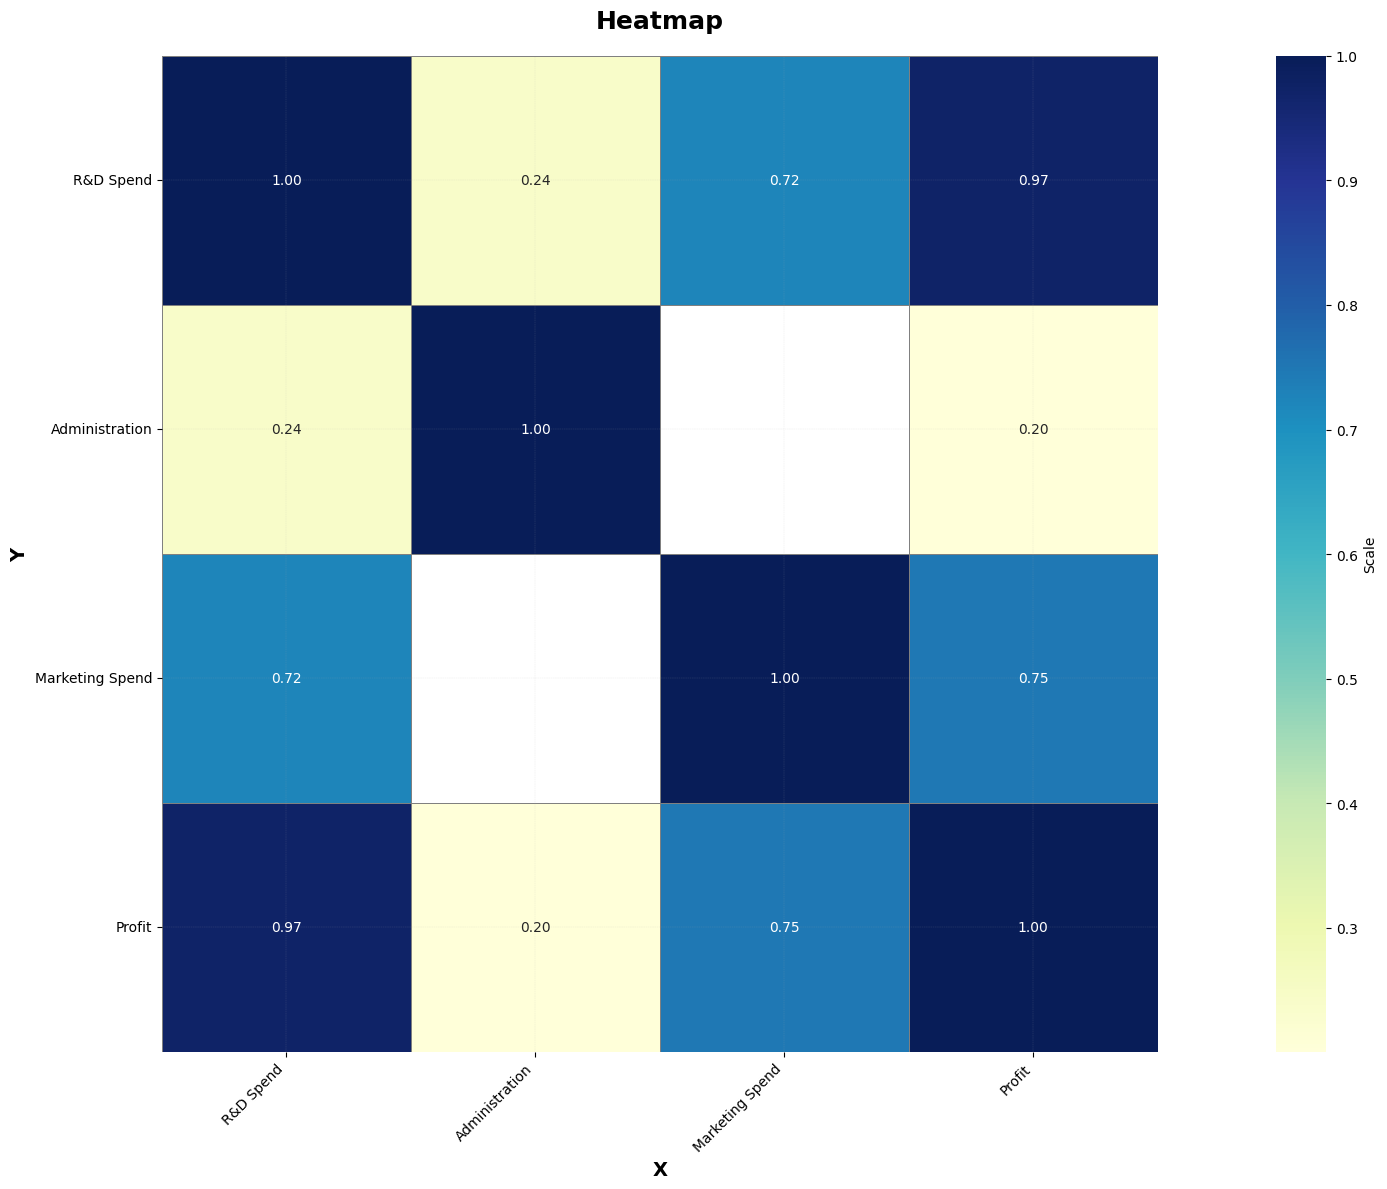

In [19]:
# Create a figure and axis
plt.figure(figsize=(24, 12))

# Create a heatmap with customization
heatmap = sns.heatmap(
    data=correlations,
    annot=True,              # Annotate cells with the data value
    fmt=".2f",               # Format the annotations to 2 decimal places
    cmap="YlGnBu",           # Colormap
    cbar=True,               # Show color bar
    cbar_kws={'label': 'Scale'},  # Color bar customization
    linewidths=0.5,          # Line width between cells
    linecolor='gray',        # Line color between cells
    square=True,             # Force square cells
    mask=correlations<0.1,               # Do not mask any data
    annot_kws={"size": 10},  # Annotation font size
    xticklabels=True,        # Show x-axis labels
    yticklabels=True,        # Show y-axis labels
    robust=True              # Robust colormap limits
)

# Customize the plot
plt.title('Heatmap', fontsize=18, weight='bold', pad=20)
plt.xlabel('X', fontsize=14, weight='bold')
plt.ylabel('Y', fontsize=14, weight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels
plt.yticks(rotation=0)

# Adjust layout for better fit
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.3)
# Display the heatmap
plt.show()

## Scatter plot

In [20]:
df.columns.tolist()

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

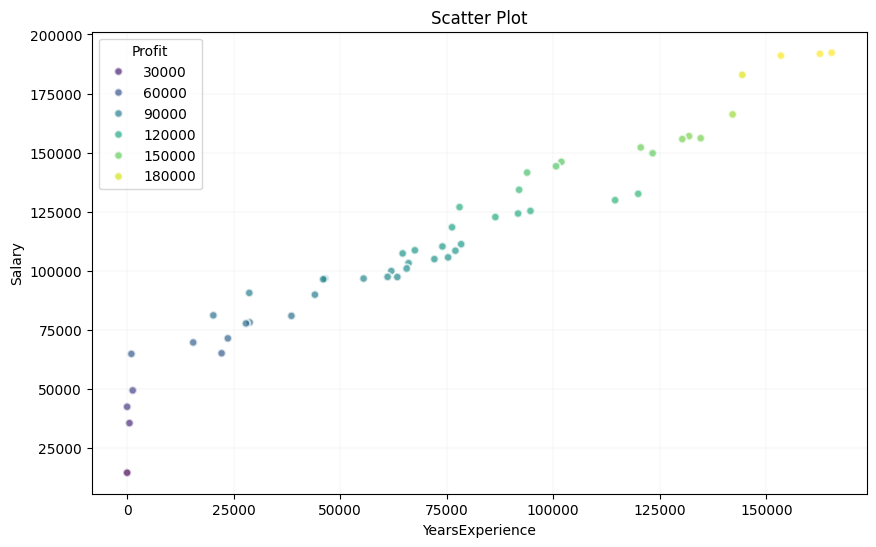

In [21]:
# Create Seaborn scatter plot with customization
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
                        data=df, 
                        x='R&D Spend', 
                        y='Profit',
                        hue = 'Profit',
                        palette='viridis', 
                        sizes=(20, 500), 
                        alpha=0.7, 
                        edgecolor='w', 
                        linewidth=1.5
)
# Customize plot
plt.title('Scatter Plot')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.grid(True, linewidth=0.3, alpha=0.3)
# Add legend

# Display plot
plt.show()

## Histogram

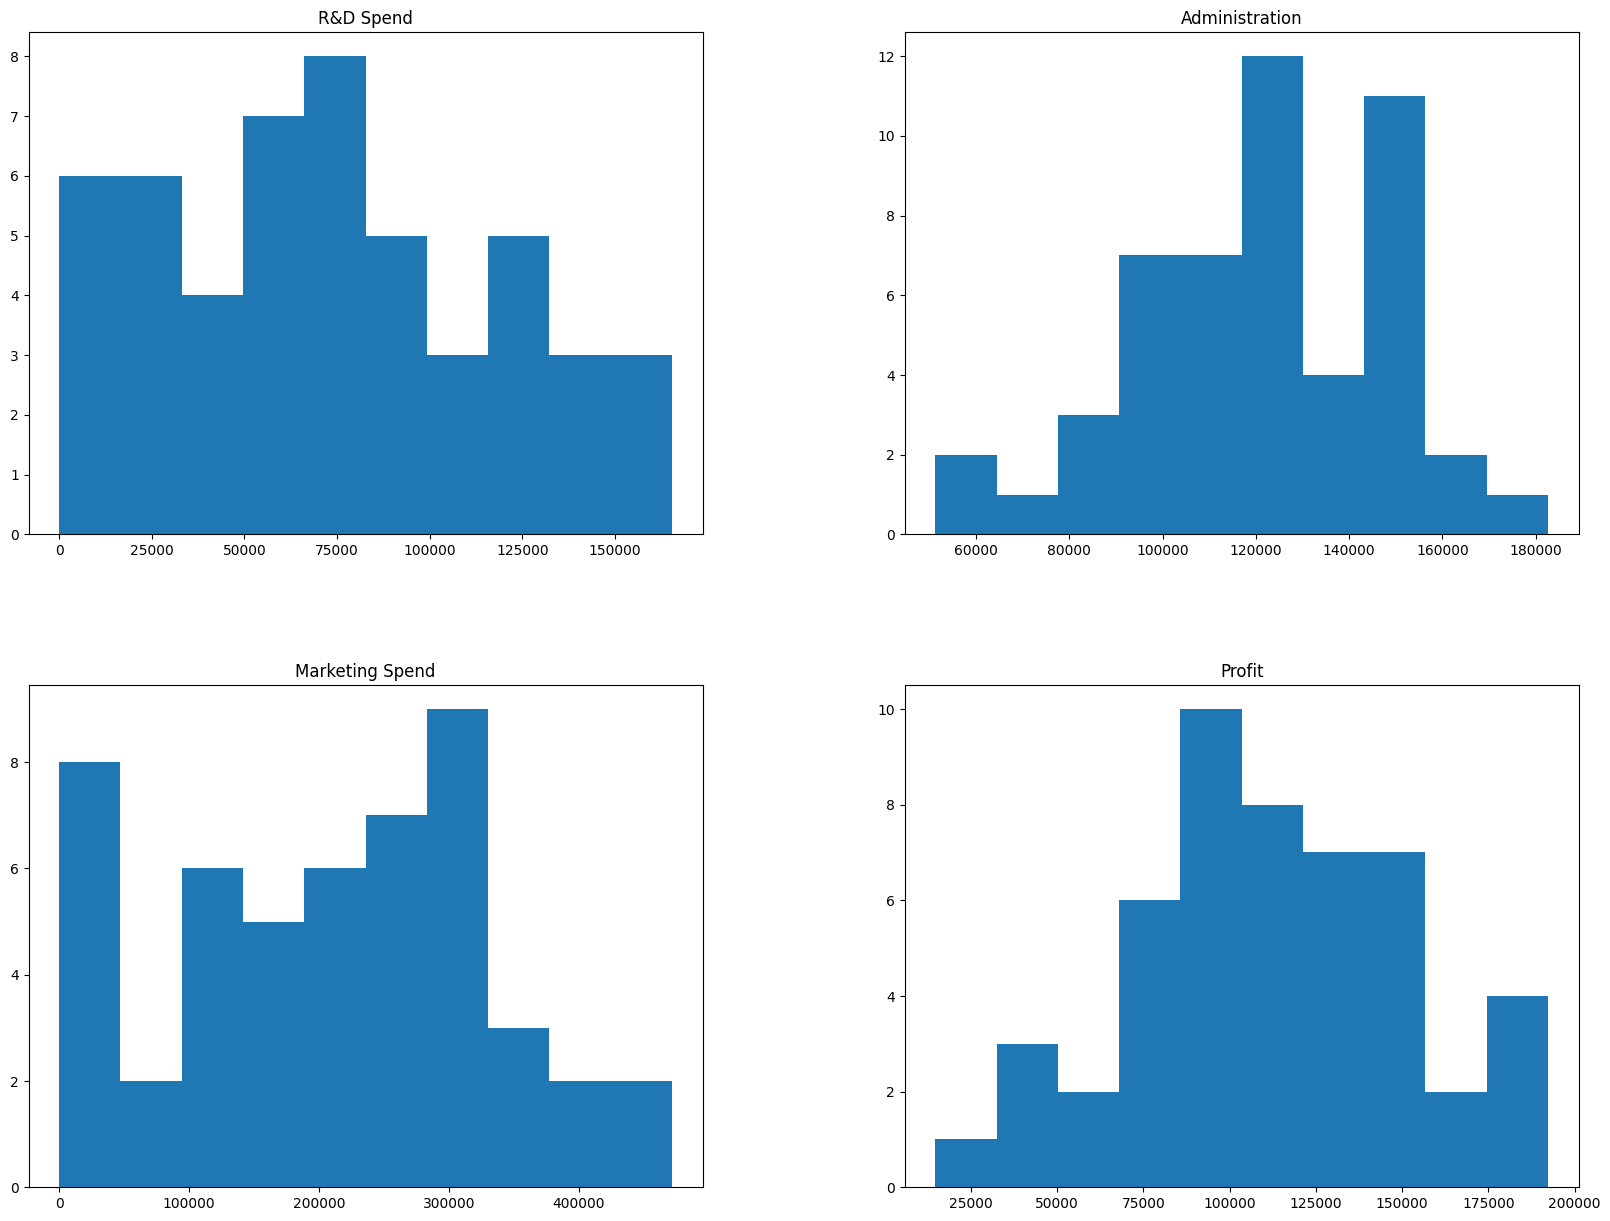

In [22]:
df.hist(figsize=(20,15),grid=False,)
plt.show()

# # or
# fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (8, 6))
# colors = ["#e24a33", "#348abd", "#988ed5", "#777777"] # whatever the colors may be but it should be different for each histogram.
# for index, column in enumerate(correlations.columns):
#     ax = axes.flatten()[index]
#     ax.hist(df[column], color = colors[index], label = column)
#     ax.legend(loc = "best")
# plt.suptitle("Desired Histograms", size = 20)
# plt.show()

## show DataFrame

In [23]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Data Encoding

## If it have more than two different words

### get_dummies

In [24]:
dummies = []
cols = ['State']
for col in cols:
    dummies.append(pd.get_dummies(df[col], drop_first=True, dtype=float))
titanic_dummies = pd.concat(dummies, axis=1)
df = pd.concat((df, titanic_dummies), axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,1.0,0.0


In [25]:
df=df.drop(cols,axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,1.0,0.0


# save data_set

In [26]:
df.to_csv('50_StartUp_dataset.csv')